In [8]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

In [9]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = tensorflow.keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = tensorflow.keras.Model(input_img, decoded)

In [12]:
# This model maps an input to its encoded representation
encoder = tensorflow.keras.Model(input_img, encoded)

In [13]:
# This is our encoded (32-dimensional) input
encoded_input = tensorflow.keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = tensorflow.keras.Model(encoded_input, decoder_layer(encoded_input))

In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)


In [16]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2758 - val_loss: 0.1864
Epoch 2/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1683 - val_loss: 0.1519
Epoch 3/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1434 - val_loss: 0.1329
Epoch 4/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1280 - val_loss: 0.1205
Epoch 5/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1178 - val_loss: 0.1126
Epoch 6/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1107 - val_loss: 0.1067
Epoch 7/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1056 - val_loss: 0.1022
Epoch 8/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1018 - val_loss: 0.0990
Epoch 9/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0992 - val_

In [17]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

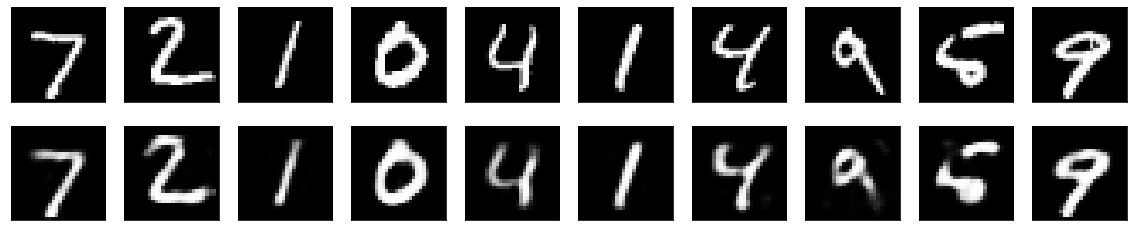

In [18]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()